In [1]:
import sys
!{sys.executable} --version
# !pip install qpsolvers

import math
import numpy as np
from datetime import datetime
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from IPython.display import display
from math import log
from qpsolvers import solve_qp

%matplotlib inline

Python 3.7.4


In [2]:
# https://en.wikipedia.org/wiki/Dow_Jones_Industrial_Average

companies, tickers = ['Honeywell','Salesforce'],['HON','CRM']
companies, tickers = ['Facebook','Amazon','Apple','Netflix','Google'],['FB','AMZN','AAPL','NFLX','GOOG']

DJ30 = pd.read_excel('DowJones30.xlsx',header=None)
tickers, companies = list(DJ30.iloc[:-1,0].values), list(DJ30.iloc[:-1,1].values) # exclude DOW 

tickers_df = yf.download(tickers, 
                      start='2017-01-01', 
                      end='2021-09-04', 
                      progress=False, auto_adjust=True)
display(tickers_df.head())
display(tickers_df.tail())

returns = tickers_df['Close'].applymap(log).diff()[1:]

# annualize returns and covariance

stats = returns.agg(['mean', 'std', 'var'])
annual_returns = stats.transpose()['mean'] * 252
annual_covar = returns.cov() * 252
display(stats)
display(annual_covar)
print(annual_returns)

Close                                                \
                 AAPL        AMGN        AXP          BA        CAT   
Date                                                                  
2017-01-03  27.372364  131.576508  70.130295  145.533691  82.979729   
2017-01-04  27.341722  133.444580  71.279961  147.063477  82.608917   
2017-01-05  27.480766  133.540573  70.401344  147.146881  82.105705   
2017-01-06  27.787128  136.857773  70.541565  147.508514  82.141014   
2017-01-09  28.041647  138.655914  70.906090  146.785324  81.549484   

                                                                     ...  \
                  CRM       CSCO        CVX         DIS          GS  ...   
Date                                                                 ...   
2017-01-03  70.540001  26.138748  95.398193  101.584351  222.430725  ...   
2017-01-04  72.800003  25.983368  95.373909  102.886719  223.867096  ...   
2017-01-05  72.790001  26.043791  94.961060  102.829262  222.200531  ...   
2017-01-06  73.800003  26.095583  94.580612  104.361458  225.496887  ...   
2017-01-09  73.959999  26.052423  93.771111  103.767731  223.646118  ...   

              Volume                                                  \
                 MRK      MSFT       NKE        PG      TRV      UNH   
Date                                                                   
2017-01-03  12564158  20694100  13295600   8792700  1955400  3539700   
2017-01-04   9863671  21340000  13759500   8096700  1780200  2695200   
2017-01-05  10581446  24876000   8682200   6852400  2696500  2961100   
2017-01-06  10730053  19922900  12532400   4799900  1532300  3081300   
2017-01-09  10201861  20382700   8835300  11000600  1526200  3040800   

                                                   
                   V        VZ      WBA       WMT  
Date                                               
2017-01-03  13785200  22891700  4942700  10473200  
2017-01-04   8033100  18316100  4125500   7918000  
2017-01-05   7805100  13840600  7401400   7099200  
2017-01-06   8898300  15615000  3949700   9491100  
2017-01-09   7305300  14097200  3293000   8685200  

[5 rows x 145 columns]

Close                                                  \
                  AAPL        AMGN         AXP          BA         CAT   
Date                                                                     
2021-08-30  153.119995  224.130005  164.259995  217.660004  211.449997   
2021-08-31  151.830002  225.529999  165.960007  219.500000  210.869995   
2021-09-01  152.509995  223.350006  164.440002  218.119995  207.960007   
2021-09-02  153.649994  225.960007  162.050003  220.830002  211.779999   
2021-09-03  154.300003  226.369995  159.300003  218.169998  210.369995   

                                                                      ...  \
                   CRM       CSCO        CVX         DIS          GS  ...   
Date                                                                  ...   
2021-08-30  264.970001  58.733227  98.389999  179.979996  411.600006  ...   
2021-08-31  265.269989  58.623966  96.769997  181.300003  413.510010  ...   
2021-09-01  268.320007  58.643833  95.709999  183.479996  413.660004  ...   
2021-09-02  264.149994  59.130543  97.709999  181.860001  414.500000  ...   
2021-09-03  267.079987  59.021278  97.489998  181.000000  411.309998  ...   

              Volume                                                          \
                 MRK      MSFT      NKE       PG      TRV      UNH         V   
Date                                                                           
2021-08-30   7339700  16348100  3537100  3845800   460700  1284200   6448000   
2021-08-31  10949500  26285300  7545600  9642400  1568700  4249100   9405100   
2021-09-01   9187200  18983800  4706500  6214200  1133800  2034400   8177600   
2021-09-02   6559400  16285600  4632100  5392500   912700  3137400  19708800   
2021-09-03   6629800  14747900  4254500  5466400   698900  1604800  11532000   

                                         
                  VZ       WBA      WMT  
Date                                     
2021-08-30  11621200   2461700  5480200  
2021-08-31  18405600  11814400  8359500  
2021-09-01  12647300   5212400  6352200  
2021-09-02  12875900   6021100  6672700  
2021-09-03  11006200   3338000  5737300  

[5 rows x 145 columns]

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,GS,...,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT
mean,0.001471,0.000461,0.000698,0.000344,0.000791,0.001132,0.000693,0.000018,0.000491,0.000523,...,0.000368,0.001396,0.001016,0.000572,0.000325,0.000877,0.000911,0.000192,-0.000285,0.000743
std,0.019459,0.016092,0.021567,0.030167,0.019988,0.021000,0.017329,0.021450,0.018255,0.020139,...,0.013671,0.017531,0.018419,0.012877,0.017627,0.018274,0.016647,0.011932,0.020103,0.013885
var,0.000379,0.000259,0.000465,0.000910,0.000400,0.000441,0.000300,0.000460,0.000333,0.000406,...,0.000187,0.000307,0.000339,0.000166,0.000311,0.000334,0.000277,0.000142,0.000404,0.000193


,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,GS,...,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT
AAPL,0.095420,0.037497,0.047275,0.061318,0.042051,0.060297,0.049675,0.041113,0.037564,0.050324,...,0.025139,0.064031,0.042068,0.026131,0.032635,0.043588,0.051566,0.015195,0.031460,0.025285
AMGN,0.037497,0.065252,0.032518,0.030372,0.033661,0.034197,0.036147,0.031550,0.026112,0.033282,...,0.031906,0.038454,0.026151,0.025214,0.027355,0.037603,0.032690,0.018621,0.031766,0.022657
AXP,0.047275,0.032518,0.117211,0.109127,0.066423,0.046515,0.050961,0.083097,0.064707,0.083268,...,0.029204,0.048627,0.051742,0.026290,0.063486,0.054944,0.065256,0.024175,0.045275,0.018524
BA,0.061318,0.030372,0.109127,0.229329,0.080592,0.059057,0.057106,0.098965,0.073247,0.091731,...,0.030749,0.057845,0.062104,0.027599,0.072640,0.059770,0.069643,0.025301,0.053506,0.020378
CAT,0.042051,0.033661,0.066423,0.080592,0.100675,0.039610,0.047559,0.063062,0.046605,0.065273,...,0.024995,0.041167,0.042864,0.022751,0.043454,0.040308,0.046727,0.020531,0.044015,0.019792
CRM,0.060297,0.034197,0.046515,0.059057,0.039610,0.111128,0.047055,0.038499,0.036309,0.045085,...,0.026700,0.066879,0.041418,0.021157,0.033312,0.040428,0.056157,0.013425,0.023593,0.021881
CSCO,0.049675,0.036147,0.050961,0.057106,0.047559,0.047055,0.075671,0.044582,0.040999,0.048174,...,0.028005,0.050663,0.039674,0.026980,0.034176,0.039050,0.046426,0.021305,0.040638,0.023945
CVX,0.041113,0.031550,0.083097,0.098965,0.063062,0.038499,0.044582,0.115942,0.051656,0.071357,...,0.032125,0.042666,0.043663,0.022484,0.058133,0.052235,0.054396,0.023254,0.039248,0.016327
DIS,0.037564,0.026112,0.064707,0.073247,0.046605,0.036309,0.040999,0.051656,0.083978,0.054681,...,0.020873,0.038028,0.040464,0.021820,0.037305,0.034407,0.044968,0.019335,0.032558,0.017338
GS,0.050324,0.033282,0.083268,0.091731,0.065273,0.045085,0.048174,0.071357,0.054681,0.102209,...,0.027715,0.047656,0.046793,0.023580,0.055780,0.048346,0.052330,0.022170,0.044169,0.020554


AAPL    0.370578
AMGN    0.116268
AXP     0.175807
BA      0.086757
CAT     0.199344
CRM     0.285293
CSCO    0.174531
CVX     0.004648
DIS     0.123773
GS      0.131728
HD      0.216822
HON     0.174593
IBM     0.007627
INTC    0.107241
JNJ     0.115329
JPM     0.157255
KO      0.097097
MCD     0.173023
MMM     0.049294
MRK     0.092795
MSFT    0.351881
NKE     0.256045
PG      0.144257
TRV     0.081855
UNH     0.221044
V       0.229591
VZ      0.048443
WBA    -0.071868
WMT     0.187243
Name: mean, dtype: float64


# Computing the Efficient Frontier
If w is the weight vector of stocks with expected returns μ, then the portfolio return is equal to each stock’s weight multiplied by its return, i.e wTμ. The portfolio risk in terms of the covariance matrix Σ is given by wTΣw. Portfolio optimisation can then be regarded as a convex optimisation problem, and a solution can be found using quadratic programming. If we denote the target return as μ∗, the precise statement of the long-only portfolio optimisation problem is as follows:

min_w : $w^T\Sigma w$

subject to 

$$w^T \mu = \mu^*$$

$$w^T \textbf{1} = 1$$

$$w_i \geq 0$$

# Calculate the efficient frontier
### select a range of target return values ($r^*$)
### call the optimizer to find the portfolio with the minimum volatility for each $r^*$ value

# Quadratic optimizer
https://pypi.org/project/qpsolvers/

minimize     $\frac{1}{2} x^T P x + q^T x$

subject to $$G x <= h $$
$$A x = b$$
$$lb <= x <= ub$$

# Mapping variables in the quadratic optimizer
$$P = \Sigma$$

\begin{equation*}
q = \begin{bmatrix}
0 \\
0 \\
0
\end{bmatrix}
\end{equation*}

$$G, h = None, None$$

\begin{equation*}
A =  \begin{bmatrix}
r_0 & r_1 & r_2 \\
1 & 1 & 1
\end{bmatrix}
\begin{bmatrix}
w_0 \\
w_1 \\
w_2  
\end{bmatrix}=
\begin{bmatrix}
r^* \\
1 
\end{bmatrix}=b
\end{equation*}

\begin{equation*}
lb = \begin{bmatrix}
0 \\
0 \\
0
\end{bmatrix}<=
\begin{bmatrix}
w_0 \\
w_1 \\
w_2  
\end{bmatrix}<=
\begin{bmatrix}
1 \\
1 \\
1
\end{bmatrix}=ub
\end{equation*}

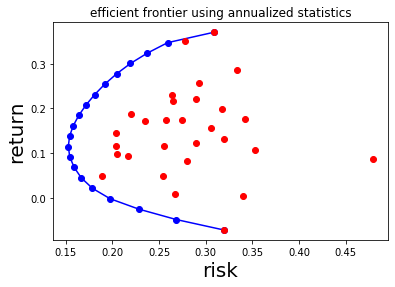

In [3]:
from numpy import array, dot
from qpsolvers import solve_qp

class create_efficient_frontier():
    def __init__(self, returns, covar):
        self.returns = np.array(returns)
        self.covar = np.array(covar)
        self.n =len(self.covar)
        self.tickers = list(returns.index)

    def get_portfolio(self, return_target):
        """create lowest variance long-only portfolio"""
        P, q = self.covar, np.array([0.] * self.n)
        G, h = None,None 
        A = np.array([annual_returns, np.array([1.0] * self.n)])
        b = np.array([return_target, 1.0])
        lb, ub = np.array([0.] * self.n),np.array([1.] * self.n)

        self.portfolio = solve_qp(P, q, G, h, A, b, lb, ub)
        return {"portfolio":self.portfolio, "risk_ret":self.risk_return()}

    def risk_return(self):
        return np.sqrt(self.portfolio.dot(self.covar.dot(self.portfolio))),\
            self.returns.dot(self.portfolio)

ef = create_efficient_frontier(annual_returns, annual_covar)
min_return, max_return = min(annual_returns)+1e-6, max(annual_returns)-1e-6   #########################
frontier = np.array([ef.get_portfolio(r)['risk_ret'] 
                     for r in np.linspace(min_return, max_return, 20)]).T

plt.plot(frontier[0], frontier[1], 'o-', color='blue') # plot the efficient frontier
for r, s in zip(annual_returns, np.sqrt(np.diag(annual_covar))):
    plt.plot([s], [r], 'o', color='red')
plt.title('efficient frontier using annualized statistics')
plt.xlabel('risk', fontsize=20)
plt.ylabel('return', fontsize=20)
plt.show()

# Portfolios on the efficient frontier

In [4]:
frontier_pf = pd.DataFrame(np.array([ef.get_portfolio(r)['portfolio'] 
                     for r in np.linspace(min_return, max_return, 20)]),
                           columns=ef.tickers)
display(frontier_pf[-4:])
frontier.T[-4:]

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,GS,...,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT
16,0.248493,-4.457846e-17,4.210283e-18,-4.083371e-18,7.433122e-18,9.686730e-18,-8.714639e-17,1.197347e-17,7.422858e-17,-3.563865e-17,...,-1.626815e-16,0.359389,0.127148,-2.054066e-17,-7.689270e-18,-6.045353e-18,6.369568e-17,-1.955229e-17,2.198762e-16,0.264971
17,0.313214,-9.405459e-17,1.613638e-17,5.502912e-18,1.686731e-17,1.829153e-17,-1.325876e-16,1.879654e-17,1.089295e-16,-5.449351e-17,...,-1.775987e-16,0.442565,0.094110,-1.540246e-17,1.674560e-17,-6.076121e-18,-2.266402e-17,-8.084934e-17,2.817197e-16,0.150111
18,0.377935,-1.157751e-16,5.581805e-17,1.508920e-17,2.630149e-17,4.077412e-17,-1.780288e-16,2.561962e-17,1.436305e-16,-4.559281e-17,...,-1.925159e-16,0.525741,0.061072,-1.026425e-17,4.118047e-17,-6.106889e-18,-1.090237e-16,-1.699020e-16,2.880521e-16,0.035252
19,0.999947,-1.865045e-16,1.406521e-16,7.843875e-17,1.335294e-16,1.345722e-16,-3.614706e-16,2.867971e-21,2.962482e-16,-4.380857e-21,...,-5.101882e-16,0.000053,0.000000,-3.044927e-22,4.852623e-21,1.329828e-16,-5.873833e-16,-1.735194e-16,3.107580e-16,0.000000


array([[0.21942095, 0.30071755],
       [0.23759537, 0.32400409],
       [0.25923177, 0.34729064],
       [0.30889641, 0.37057719]])

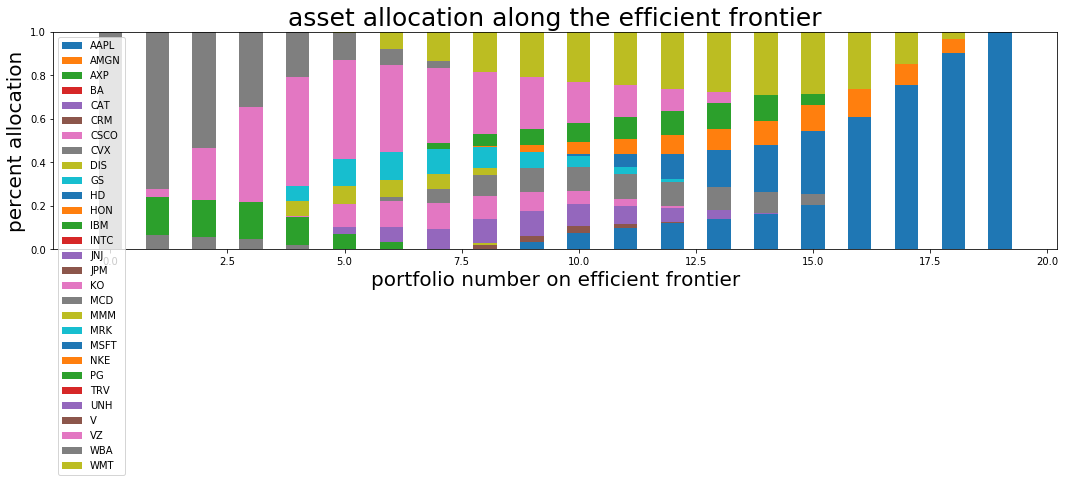

In [5]:
plt.figure(figsize=(18,4))
ind, width = range(len(frontier_pf)), .5
cumulative = [0.] * frontier_pf.shape[0]
for t in frontier_pf.columns:
    plt.bar(ind, frontier_pf[t], width, bottom=cumulative, label=t)
    cumulative += frontier_pf[t]
    
plt.legend(loc='upper left')
plt.title("asset allocation along the efficient frontier", fontsize=25)
plt.ylabel("percent allocation", fontsize=20)
plt.xlabel("portfolio number on efficient frontier", fontsize=20)
plt.show()

# locate the min variance portfolio on the efficient frontier

In [6]:
risk_free_rate = 0.05

frontier1 = np.array([ef.get_portfolio(r) for r in np.linspace(min_return, max_return, 20)]).T
frontier1_portfolio = pd.DataFrame([p['portfolio'] for p in frontier1], columns=ef.tickers)
frontier1_rr = pd.DataFrame([p['risk_ret'] for p in frontier1], columns=['risk','return'])

minVar = [i for i,r in enumerate(frontier1_rr['risk']) if r == frontier1_rr['risk'].min()]
print('minimum variance portfolio')
display(frontier1_rr.iloc[minVar, :])
display(frontier1_portfolio.iloc[minVar, :])

minimum variance portfolio


,risk,return
8,0.152804,0.114425


,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,GS,...,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT
8,-9.916984e-19,-4.609688e-19,1.129946e-17,-9.275472e-18,1.479175e-18,0.019714,-6.546340e-18,-6.348229e-18,0.006727,6.399624e-18,...,0.098328,5.729163e-18,0.003043,0.055795,-5.916330e-18,-5.506841e-17,4.112499e-17,0.282957,-1.372661e-19,0.185722


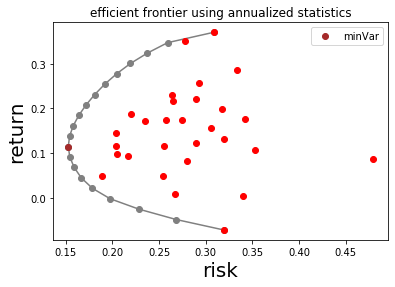

In [7]:
plt.plot(frontier[0], frontier[1], 'o-', color='gray') # plot the efficient frontier
for r, s in zip(annual_returns, np.sqrt(np.diag(annual_covar))):
    plt.plot([s], [r], 'o', color='red') 
    
mV = frontier1_rr.iloc[minVar, :].values[0]
plt.plot(mV[0],mV[1], 'o', color='brown', label='minVar')

plt.title('efficient frontier using annualized statistics')
plt.xlabel('risk', fontsize=20)
plt.ylabel('return', fontsize=20)
plt.legend()
plt.show()

# Component beta

In [8]:
returns[:5]

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,GS,...,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-04,-0.001120,0.014098,0.016260,0.010457,-0.004479,0.031536,-0.005962,-0.000255,0.012739,0.006437,...,-0.000333,-0.004484,0.020753,0.003557,-0.005391,0.002845,0.008143,-0.001100,0.000241,0.005809
2017-01-05,0.005073,0.000719,-0.012403,0.000567,-0.006110,-0.000137,0.002323,-0.004338,-0.000559,-0.007472,...,-0.000333,0.000000,-0.000188,0.006605,-0.016096,0.001666,0.011660,0.002199,0.000602,0.002170
2017-01-06,0.011087,0.024537,0.001990,0.002455,0.000430,0.013780,0.001987,-0.004014,0.014790,0.014726,...,0.002658,0.008631,0.015892,-0.000353,-0.000507,0.001417,0.013717,-0.014946,0.000843,-0.013821
2017-01-09,0.009118,0.013053,0.005154,-0.004915,-0.007227,0.002166,-0.001655,-0.008596,-0.005705,-0.008241,...,0.013677,-0.003188,-0.009880,-0.007437,-0.008065,-0.002836,-0.005611,-0.010950,-0.006640,0.006571
2017-01-10,0.001008,-0.000503,0.010360,0.004726,0.015683,0.000270,0.006605,-0.007625,0.000185,-0.001318,...,-0.019502,-0.000319,-0.005071,-0.010841,-0.001194,-0.002287,-0.005397,0.001518,0.001452,-0.007010


In [9]:
display(frontier1_portfolio.iloc[minVar, :])
display(frontier1_rr.iloc[minVar, :])

pf = np.array(frontier1_portfolio.iloc[minVar, :])
portfolio_returns = np.array(returns).dot(pf.T)

np.std(portfolio_returns) * np.sqrt(252), np.mean(portfolio_returns) * 252

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,GS,...,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT
8,-9.916984e-19,-4.609688e-19,1.129946e-17,-9.275472e-18,1.479175e-18,0.019714,-6.546340e-18,-6.348229e-18,0.006727,6.399624e-18,...,0.098328,5.729163e-18,0.003043,0.055795,-5.916330e-18,-5.506841e-17,4.112499e-17,0.282957,-1.372661e-19,0.185722


,risk,return
8,0.152804,0.114425


(0.15273926012598787, 0.11442516583280152)

# Homework answers

In [10]:
# https://scipy-lectures.org/packages/statistics/auto_examples/plot_regression.html

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

returns_p = returns.copy()
returns_p['portfolio'] = portfolio_returns
display(returns_p[:5])

model = ols("AAPL ~ portfolio", returns_p).fit()

print(model.summary())
anova_results = anova_lm(model)

print('\nANOVA results')
print(anova_results)

C:\Users\Elliot\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,GS,...,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT,portfolio
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-04,-0.001120,0.014098,0.016260,0.010457,-0.004479,0.031536,-0.005962,-0.000255,0.012739,0.006437,...,-0.004484,0.020753,0.003557,-0.005391,0.002845,0.008143,-0.001100,0.000241,0.005809,0.001079
2017-01-05,0.005073,0.000719,-0.012403,0.000567,-0.006110,-0.000137,0.002323,-0.004338,-0.000559,-0.007472,...,0.000000,-0.000188,0.006605,-0.016096,0.001666,0.011660,0.002199,0.000602,0.002170,0.002853
2017-01-06,0.011087,0.024537,0.001990,0.002455,0.000430,0.013780,0.001987,-0.004014,0.014790,0.014726,...,0.008631,0.015892,-0.000353,-0.000507,0.001417,0.013717,-0.014946,0.000843,-0.013821,-0.005764
2017-01-09,0.009118,0.013053,0.005154,-0.004915,-0.007227,0.002166,-0.001655,-0.008596,-0.005705,-0.008241,...,-0.003188,-0.009880,-0.007437,-0.008065,-0.002836,-0.005611,-0.010950,-0.006640,0.006571,-0.002493
2017-01-10,0.001008,-0.000503,0.010360,0.004726,0.015683,0.000270,0.006605,-0.007625,0.000185,-0.001318,...,-0.000319,-0.005071,-0.010841,-0.001194,-0.002287,-0.005397,0.001518,0.001452,-0.007010,-0.004506


                            OLS Regression Results                            
Dep. Variable:                   AAPL   R-squared:                       0.268
Model:                            OLS   Adj. R-squared:                  0.267
Method:                 Least Squares   F-statistic:                     429.6
Date:                Tue, 05 Oct 2021   Prob (F-statistic):           1.44e-81
Time:                        14:52:52   Log-Likelihood:                 3148.0
No. Observations:                1176   AIC:                            -6292.
Df Residuals:                    1174   BIC:                            -6282.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0010      0.000      2.047      0.0

# locate the max Sharpe portfolio on the efficient frontier

maximum Sharpe portfolio (risk free rate = 0.05)'


,risk,return,Sharpe
17,0.237595,0.324004,1.153238


,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,GS,...,MRK,MSFT,NKE,PG,TRV,UNH,V,VZ,WBA,WMT
17,0.313214,-9.405459e-17,1.613638e-17,5.502912e-18,1.686731e-17,1.829153e-17,-1.325876e-16,1.879654e-17,1.089295e-16,-5.449351e-17,...,-1.775987e-16,0.442565,0.09411,-1.540246e-17,1.674560e-17,-6.076121e-18,-2.266402e-17,-8.084934e-17,2.817197e-16,0.150111


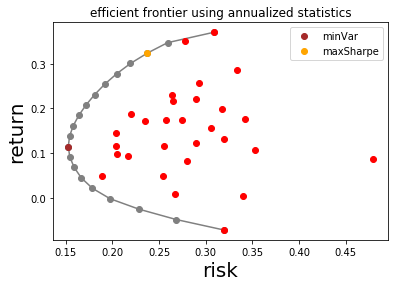

In [11]:
risk_free_rate = 0.05
frontier1_rr['Sharpe'] = (frontier1_rr['return'] - risk_free_rate) / frontier1_rr['risk']

print(f"maximum Sharpe portfolio (risk free rate = {risk_free_rate})'")
maxSharpe = [i for i,r in enumerate(frontier1_rr['Sharpe']) if r == frontier1_rr['Sharpe'].max()]
display(frontier1_rr.iloc[maxSharpe, :])
display(frontier1_portfolio.iloc[maxSharpe, :])

plt.plot(frontier[0], frontier[1], 'o-', color='gray') # plot the efficient frontier
for r, s in zip(annual_returns, np.sqrt(np.diag(annual_covar))):
    plt.plot([s], [r], 'o', color='red') 
    
mV = frontier1_rr.iloc[minVar, :].values[0]
plt.plot(mV[0],mV[1], 'o', color='brown', label='minVar')

mS = frontier1_rr.iloc[maxSharpe, :].values[0]                 ####
plt.plot(mS[0],mS[1], 'o', color='orange', label='maxSharpe')  ####

plt.title('efficient frontier using annualized statistics')
plt.xlabel('risk', fontsize=20)
plt.ylabel('return', fontsize=20)
plt.legend()
plt.show()

# max Sharpe portfolio positions

In [12]:
last_date = tickers_df.index[-1]

max_Sharpe_portfolio = frontier1_portfolio.iloc[maxSharpe, :].transpose()
mS_portfolio = max_Sharpe_portfolio[max_Sharpe_portfolio.iloc[:,0] > 1e-10]
mS_portfolio.columns = ['allocation']
display(mS_portfolio)

# https://scipy-lectures.org/packages/statistics/auto_examples/plot_regression.html

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

pf = np.array(frontier1_portfolio.iloc[maxSharpe, :])
portfolio_returns = np.array(returns).dot(pf.T)

print(np.std(portfolio_returns) * np.sqrt(252), np.mean(portfolio_returns) * 252)

returns_p = returns.copy()
returns_p.loc[:,'portfolio'] = portfolio_returns

beta = []
for ticker in mS_portfolio.index:
    model = ols(f"{ticker} ~ portfolio", returns_p).fit()
#     print(model.params)
    beta.append(model.params.loc["portfolio"]) 

W = 1000000   # total portfolio size

mS_portfolio.loc[:,'dollars'] = mS_portfolio['allocation'] * W
mS_portfolio.loc[:,'share price'] = tickers_df.loc[last_date, ('Close', mS_portfolio.index)].values
mS_portfolio.loc[:,'shares'] = mS_portfolio['dollars'] / mS_portfolio['share price']
mS_portfolio.loc[:,'beta'] = beta
mS_portfolio

,allocation
AAPL,0.313214
MSFT,0.442565
NKE,0.094110
WMT,0.150111


0.23749432732171497 0.3240040946273253


C:\Users\Elliot\Anaconda3\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


,allocation,dollars,share price,shares,beta
AAPL,0.313214,313213.888539,154.300003,2029.902024,1.168782
MSFT,0.442565,442565.027722,301.140015,1469.632085,1.101024
NKE,0.094110,94109.964589,163.289993,576.336386,0.753721
WMT,0.150111,150111.119150,149.250000,1005.769643,0.504387


In [13]:
portfolio_VaR = 1.645 * np.std(portfolio_returns) * np.sqrt(252)
print(f"""95% annualized portfolio VaR = {portfolio_VaR:0.4f} in dollars = {portfolio_VaR * W:0.4f}""")

mS_portfolio.loc[:,'undiversified VaR'] = \
    [1.645 * np.std(returns[ticker]) * np.sqrt(252) for ticker in mS_portfolio.index] * \
    mS_portfolio['dollars']
mS_portfolio.loc[:,'marginal VaR'] = portfolio_VaR / W * mS_portfolio['beta'] 
mS_portfolio.loc[:,'marginal VaR'] = portfolio_VaR / W * mS_portfolio['beta']
mS_portfolio.loc[:,'component VaR'] = portfolio_VaR * mS_portfolio['beta'] * mS_portfolio['allocation']

mS_portfolio

95% annualized portfolio VaR = 0.3907 in dollars = 390678.1684


C:\Users\Elliot\Anaconda3\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\Users\Elliot\Anaconda3\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,allocation,dollars,share price,shares,beta,undiversified VaR,marginal VaR,component VaR
AAPL,0.313214,313213.888539,154.300003,2029.902024,1.168782,159089.928265,4.566174e-07,0.143019
MSFT,0.442565,442565.027722,301.140015,1469.632085,1.101024,202514.247629,4.301460e-07,0.190368
NKE,0.094110,94109.964589,163.289993,576.336386,0.753721,45247.303220,2.944624e-07,0.027712
WMT,0.150111,150111.119150,149.250000,1005.769643,0.504387,54404.789106,1.970529e-07,0.029580


# decrease in VaR according to marginal VaR

In [14]:
position_sale_USD = 50000

portfolio_VaR_USD = W * portfolio_VaR
VaR_decrease = position_sale_USD * W * mS_portfolio.loc['MSFT','marginal VaR']
new_Var = portfolio_VaR_USD - VaR_decrease
f"portfolio VaR {portfolio_VaR_USD:,.2f} - VaR decrement {VaR_decrease:,.2f} = {new_Var:,.2f}"

'portfolio VaR 390,678.17 - VaR decrement 21,507.30 = 369,170.87'

# recalculate VaR when the MSFT position is reduced

In [15]:
pf_df = frontier1_portfolio.iloc[maxSharpe, :]
pf_df.loc[:,'MSFT'] -= position_sale_USD / W

new_portfolio_returns = np.array(returns).dot(np.array(pf_df).T)
new_portfolio_VaR = 1.645 * np.std(new_portfolio_returns) * np.sqrt(252)

f"portfolio VaR {portfolio_VaR_USD:,.2f} vs. new portfolio VaR {W * new_portfolio_VaR:,.2f}"

C:\Users\Elliot\Anaconda3\lib\site-packages\pandas\core\indexing.py:1951: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[selected_item_labels] = value


'portfolio VaR 390,678.17 vs. new portfolio VaR 369,253.36'

# recalculate VaR when the MSFT position is reallocated to other positions

In [16]:
ms_list = list(mS_portfolio.index)
ms_list.remove('MSFT')

pos_add = position_sale_USD / W / len(ms_list)

pf_df = frontier1_portfolio.iloc[maxSharpe, :]
pf_df.loc[:,ms_list] += pos_add
pf_df.loc[:,'MSFT'] -= position_sale_USD / W

new_portfolio_returns = np.array(returns).dot(np.array(pf_df).T)
new_portfolio_VaR = 1.645 * np.std(new_portfolio_returns) * np.sqrt(252)

f"portfolio VaR {portfolio_VaR_USD:,.2f} vs. new portfolio VaR {W * new_portfolio_VaR:,.2f}"

C:\Users\Elliot\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\Elliot\Anaconda3\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


'portfolio VaR 390,678.17 vs. new portfolio VaR 385,231.78'